In [ ]:
import shutil
import os

def remove_macosx_folder(base_path="."):
    """
    Remove the __MACOSX folder from the specified directory, if it exists.

    Parameters:
        base_path (str): The base directory to search for the __MACOSX folder.
    """
    macosx_path = os.path.join(base_path, "__MACOSX")
    if os.path.exists(macosx_path) and os.path.isdir(macosx_path):
        print("Removing __MACOSX folder...")
        shutil.rmtree(macosx_path)
        print("__MACOSX folder removed successfully!")
    else:
        print("__MACOSX folder not found or already removed.")


In [ ]:
# Download ExDark dataset from the provided Google Drive link
import gdown

# Define the URL and destination path for the dataset
dataset_url = "https://drive.google.com/uc?id=1BHmPgu8EsHoFDDkMGLVoXIlCth2dW6Yx"
dataset_path = "ExDark.zip"  # Save in the current working directory

# Download the dataset
print("Downloading the ExDark dataset...")
gdown.download(dataset_url, dataset_path, quiet=False)
print("Dataset downloaded successfully!")

# Extract the downloaded dataset
import zipfile

# Extract the ExDark.zip file
print("Extracting the dataset...")
with zipfile.ZipFile("ExDark.zip", 'r') as zip_ref:
    zip_ref.extractall()
print("Dataset extracted successfully!")

remove_macosx_folder(".")


# Download the ground truth file from the provided Google Drive link
groundtruth_url = "https://drive.google.com/uc?id=1P3iO3UYn7KoBi5jiUkogJq96N6maZS1i"
groundtruth_path = "ExDark_groundtruth.zip"  # Save the ground truth zip in the current directory

# Download the ground truth file
print("Downloading the ground truth file...")
gdown.download(groundtruth_url, groundtruth_path, quiet=False)
print("Ground truth downloaded successfully!")

# Extract the ground truth
print("Extracting the ground truth file...")
with zipfile.ZipFile(groundtruth_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extract in the current directory
print("Ground truth extracted successfully!")

remove_macosx_folder(".")


Downloading...
From (original): https://drive.google.com/uc?id=1BHmPgu8EsHoFDDkMGLVoXIlCth2dW6Yx
From (redirected): https://drive.google.com/uc?id=1BHmPgu8EsHoFDDkMGLVoXIlCth2dW6Yx&confirm=t&uuid=a262be77-26da-44ad-aaed-26d57c8dff16
To: /content/ExDark.zip
100%|██████████| 1.49G/1.49G [00:29<00:00, 50.9MB/s]


Dataset downloaded successfully!
Extracting the dataset...
Dataset extracted successfully!
Removing __MACOSX folder...
__MACOSX folder removed successfully!


Downloading...
From (original): https://drive.google.com/uc?id=1P3iO3UYn7KoBi5jiUkogJq96N6maZS1i
From (redirected): https://drive.google.com/uc?id=1P3iO3UYn7KoBi5jiUkogJq96N6maZS1i&confirm=t&uuid=3ade99ef-6b79-498f-8542-22e71803c49c
To: /content/ExDark_groundtruth.zip
100%|██████████| 5.08M/5.08M [00:00<00:00, 102MB/s]


Ground truth downloaded successfully!
Extracting the ground truth file...
Ground truth extracted successfully!
Removing __MACOSX folder...
__MACOSX folder removed successfully!


In [ ]:
# Import necessary libraries
import pandas as pd
import gdown

# Define the URL and destination path for the metadata file
metadata_url = "https://drive.google.com/uc?id=1GkaEGTcmbEbXXOdPHbXEEXw2go5C99Sb"  # Modified link for direct access
metadata_path = "metadata.csv"  # Save the file in the current working directory

# Download the metadata file
print("Downloading the metadata file...")
gdown.download(metadata_url, metadata_path, quiet=False)
print(f"Metadata file downloaded successfully as {metadata_path}")

# Load the metadata into a Pandas DataFrame
metadata = pd.read_csv(metadata_path)

# Display the first few rows of the metadata
print("Metadata loaded successfully. Here's a preview:")
print(metadata.head())


Downloading...
From: https://drive.google.com/uc?id=1GkaEGTcmbEbXXOdPHbXEEXw2go5C99Sb
To: /content/metadata.csv
100%|██████████| 276k/276k [00:00<00:00, 11.3MB/s]

Metadata file downloaded successfully as metadata.csv
Metadata loaded successfully. Here's a preview:
         Filename    Class LightCondition IndoorOutdoor  TrainValTest
0  2015_00002.png  Bicycle         Strong       Outdoor             1
1  2015_00003.png  Bicycle           Weak       Outdoor             1
2  2015_00004.jpg  Bicycle         Object       Outdoor             1
3  2015_00005.jpg  Bicycle         Strong       Outdoor             1
4  2015_00006.jpg  Bicycle         Strong       Outdoor             1


In [ ]:
import os

# Define the output directory for preprocessed images
preprocessed_dir = "./ExDark_Preprocessed"

# Create the directory if it doesn't exist
if not os.path.exists(preprocessed_dir):
    os.makedirs(preprocessed_dir)
    print(f"Created directory for preprocessed images: {preprocessed_dir}")
else:
    print(f"Directory already exists: {preprocessed_dir}")

# Create subdirectories for each class
annotations_dir = "./ExDark_Annno"
for class_name in os.listdir(annotations_dir):
    class_subdir = os.path.join(preprocessed_dir, class_name)
    if not os.path.exists(class_subdir):
        os.makedirs(class_subdir)
        print(f"Created subdirectory: {class_subdir}")


Created directory for preprocessed images: ./ExDark_Preprocessed
Created subdirectory: ./ExDark_Preprocessed/Boat
Created subdirectory: ./ExDark_Preprocessed/Car
Created subdirectory: ./ExDark_Preprocessed/Table
Created subdirectory: ./ExDark_Preprocessed/Bottle
Created subdirectory: ./ExDark_Preprocessed/Bicycle
Created subdirectory: ./ExDark_Preprocessed/Bus
Created subdirectory: ./ExDark_Preprocessed/Chair
Created subdirectory: ./ExDark_Preprocessed/Dog
Created subdirectory: ./ExDark_Preprocessed/Motorbike
Created subdirectory: ./ExDark_Preprocessed/People
Created subdirectory: ./ExDark_Preprocessed/Cat
Created subdirectory: ./ExDark_Preprocessed/Cup


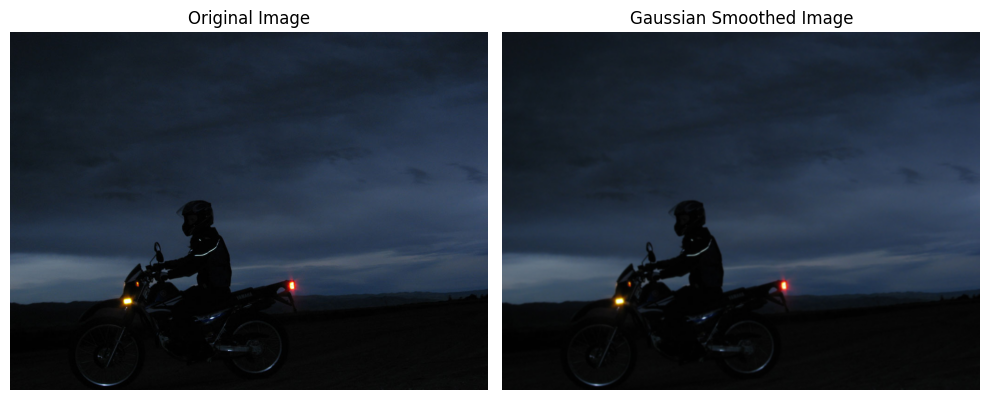

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_gaussian_smoothing(image_path):
    """
    Apply Gaussian smoothing to an image and display the result.

    Parameters:
        image_path (str): Path to the input image.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Error: Unable to read image {image_path}")
        return

    # Apply Gaussian Smoothing
    smoothed = cv2.GaussianBlur(image, (5, 5), 0)

    # Convert BGR (OpenCV) to RGB (Matplotlib)
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    smoothed_rgb = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)

    # Plot the original and smoothed images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(smoothed_rgb)
    plt.title("Gaussian Smoothed Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
input_image = "./ExDark/Motorbike/2015_06163.jpg"  # Replace with an actual image path
show_gaussian_smoothing(input_image)


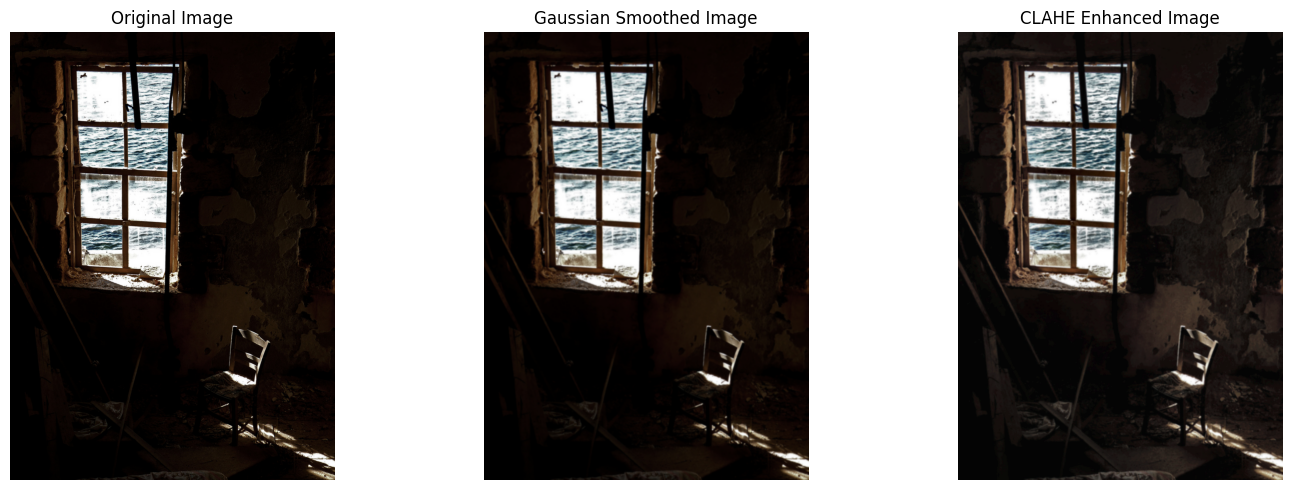

In [ ]:
def apply_clahe(image_path):
    """
    Apply CLAHE to enhance contrast of the image and display the result.

    Parameters:
        image_path (str): Path to the input image.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Error: Unable to read image {image_path}")
        return

    # Step 1: Apply Gaussian Smoothing
    smoothed = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 2: Convert to LAB color space
    lab = cv2.cvtColor(smoothed, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Step 3: Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)

    # Step 4: Merge the CLAHE-enhanced L channel back with A and B channels
    lab_clahe = cv2.merge((l_clahe, a, b))
    enhanced_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

    # Convert images to RGB for Matplotlib
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    smoothed_rgb = cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB)
    enhanced_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)

    # Plot original, smoothed, and CLAHE-enhanced images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(smoothed_rgb)
    plt.title("Gaussian Smoothed Image")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(enhanced_rgb)
    plt.title("CLAHE Enhanced Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
input_image = "./ExDark/Chair/2015_03976.jpg"  # Replace with an actual image path
apply_clahe(input_image)


In [ ]:
import pandas as pd
from tqdm import tqdm
import cv2
import os
import numpy as np

def analyze_dataset_brightness(image_paths):
    """
    Analyze the brightness of a dataset of images to determine thresholds for CLAHE parameters.

    Parameters:
        image_paths (list): List of paths to images.

    Returns:
        dict: Dictionary with brightness statistics (mean, std, min, max).
    """
    brightness_levels = []
    for image_path in tqdm(image_paths, desc="Analyzing brightness"):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image is None:
            print(f"Warning: Unable to read image {image_path}")
            continue
        lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        l, _, _ = cv2.split(lab)
        brightness_levels.append(np.mean(l))

    return {
        "mean_brightness": np.mean(brightness_levels),
        "std_brightness": np.std(brightness_levels),
        "min_brightness": np.min(brightness_levels),
        "max_brightness": np.max(brightness_levels),
    }

# Load metadata
metadata = pd.read_csv("metadata.csv")

# Filter metadata for training set
train_metadata = metadata[metadata["TrainValTest"] == 1]

# Base directory of the dataset
base_dir = "./ExDark"

# Get paths for training images
image_paths = []
valid_extensions = set()  # Use a set to collect unique extensions (case-sensitive)

for _, row in tqdm(train_metadata.iterrows(), desc="Collecting training image paths", total=len(train_metadata)):
    filename = row["Filename"]
    class_name = row["Class"]
    image_path = os.path.join(base_dir, class_name, filename)

    # Check for different suffix cases if file is missing
    if not os.path.exists(image_path):
        filename_lower = filename.lower()
        filename_upper = filename.upper()
        image_path_lower = os.path.join(base_dir, class_name, filename_lower)
        image_path_upper = os.path.join(base_dir, class_name, filename_upper)
        if os.path.exists(image_path_lower):
            image_path = image_path_lower
        elif os.path.exists(image_path_upper):
            image_path = image_path_upper
        else:
            print(f"Warning: Image not found for {filename}")
            continue

    # Collect valid extensions and paths
    ext = os.path.splitext(image_path)[-1]
    valid_extensions.add(ext)
    if cv2.haveImageReader(image_path):  # Check if OpenCV can read the file
        image_paths.append(image_path)

# Print statistics about the collected paths
print(f"Found {len(image_paths)} readable training images.")
print(f"File extensions found (case-sensitive): {sorted(valid_extensions)}")

# Analyze brightness for training images
brightness_stats = analyze_dataset_brightness(image_paths)
print("Brightness Statistics for the Training Dataset:")
print(brightness_stats)


Found 2999 readable training images.
File extensions found (case-sensitive): ['.JPEG', '.JPG', '.jpeg', '.jpg', '.png']


Analyzing brightness: 100%|██████████| 2999/2999 [00:28<00:00, 105.82it/s]

Brightness Statistics for the Training Dataset:
{'mean_brightness': 39.80114015913646, 'std_brightness': 23.090779709799083, 'min_brightness': 0.5531103286384976, 'max_brightness': 161.80688602941177}


In [ ]:
import cv2
import os
from tqdm import tqdm
import numpy as np

def compute_clahe_parameters(image):
    """
    Compute CLAHE parameters dynamically based on image characteristics.

    Parameters:
        image (numpy.ndarray): Input image in BGR format.

    Returns:
        dict: Dictionary with computed `clipLimit` and `tileGridSize`.
    """
    # Convert image to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, _, _ = cv2.split(lab)

    # Calculate mean brightness of the L channel
    mean_luminance = np.mean(l)

    # Adjust parameters based on mean luminance
    if mean_luminance < 38:  # Very dark image
        clipLimit = 4.0
        tileGridSize = (8, 8)
    elif mean_luminance < 75:  # Moderately dark image
        clipLimit = 3.0
        tileGridSize = (8, 8)
    else:  # Bright image
        clipLimit = 2.0
        tileGridSize = (16, 16)

    return {"clipLimit": clipLimit, "tileGridSize": tileGridSize}

def apply_clahe_to_dataset_dynamic(input_dir, output_dir):
    """
    Apply CLAHE preprocessing with dynamic parameters to all images in the dataset.

    Parameters:
        input_dir (str): Path to the input dataset directory.
        output_dir (str): Path to save the processed images.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Walk through the input directory
    for root, dirs, files in os.walk(input_dir):
        for file in tqdm(files, desc=f"Processing images in {root}"):
            # Check if the file is an image


            # Build input and output paths
            input_path = os.path.join(root, file)
            relative_path = os.path.relpath(root, input_dir)
            output_path = os.path.join(output_dir, relative_path)

            if not os.path.exists(output_path):
                os.makedirs(output_path)

            # Read the image
            image = cv2.imread(input_path, cv2.IMREAD_COLOR)
            if image is None:
                print(f"Error: Unable to read image {input_path}")
                continue

            # Compute dynamic CLAHE parameters
            clahe_params = compute_clahe_parameters(image)
            #print(f"Computed CLAHE Parameters: {clahe_params}")

            # Apply CLAHE
            lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=clahe_params["clipLimit"], tileGridSize=clahe_params["tileGridSize"])
            l_clahe = clahe.apply(l)
            lab_clahe = cv2.merge((l_clahe, a, b))
            enhanced_image = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

            # Save the processed image
            output_file_path = os.path.join(output_path, file)
            cv2.imwrite(output_file_path, enhanced_image)

# Example usage
input_dir = "./ExDark"  # Path to the original dataset
output_dir = "./ExDark_Preprocessed"  # Path to save the processed dataset
apply_clahe_to_dataset_dynamic(input_dir, output_dir)


Processing images in ./ExDark: 0it [00:00, ?it/s]
Processing images in ./ExDark/Cup: 100%|██████████| 519/519 [00:19<00:00, 26.25it/s]


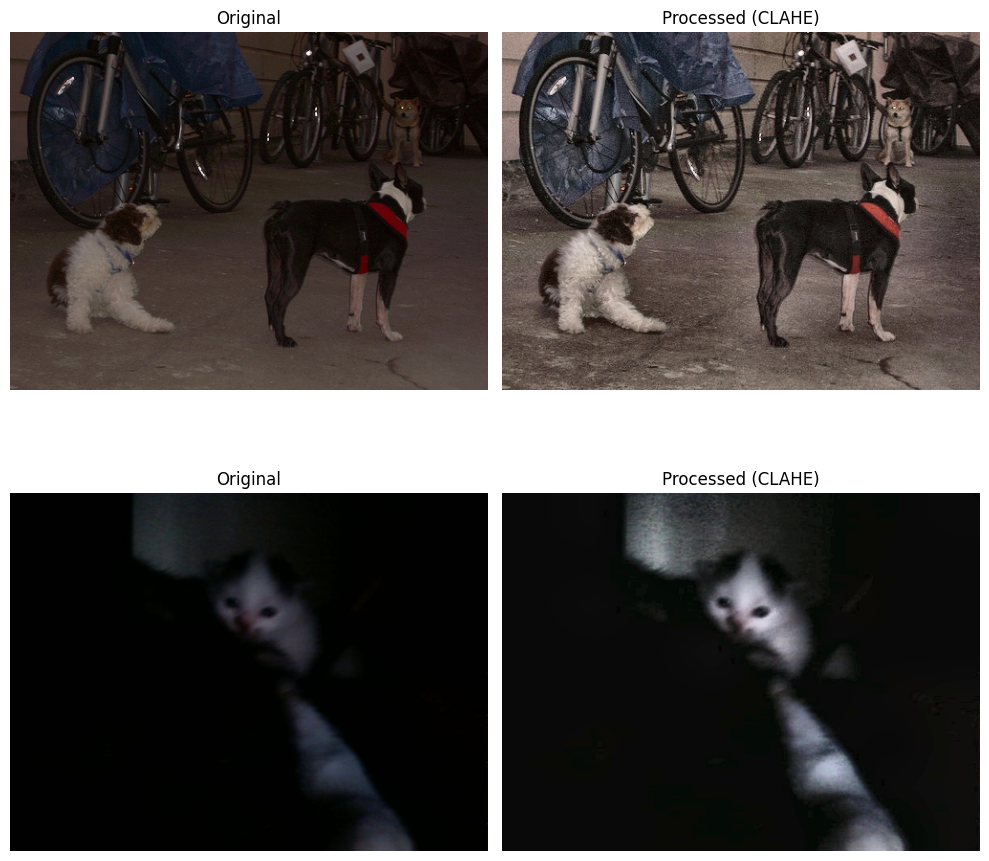

In [ ]:
import cv2
import os
import random
import matplotlib.pyplot as plt

def display_random_comparisons(input_dir, output_dir, num_samples=10):
    """
    Display random examples of original and processed images side by side.

    Parameters:
        input_dir (str): Path to the original dataset directory.
        output_dir (str): Path to the processed dataset directory.
        num_samples (int): Number of random samples to display.
    """
    # Collect all image file paths from the input directory
    image_paths = []
    for root, _, files in os.walk(input_dir):
        for file in files:
            image_paths.append(os.path.join(root, file))

    # Select a random subset of images
    random.shuffle(image_paths)
    selected_images = image_paths[:num_samples]

    # Create a figure for visualization
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))

    for i, image_path in enumerate(selected_images):
        # Read the original image
        original_image = cv2.imread(image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Construct the corresponding processed image path
        relative_path = os.path.relpath(image_path, input_dir)
        processed_image_path = os.path.join(output_dir, relative_path)

        if os.path.exists(processed_image_path):
            processed_image = cv2.imread(processed_image_path)
            processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
        else:
            processed_image = None  # If the processed image doesn't exist

        # Display original image
        axes[i, 0].imshow(original_image)
        axes[i, 0].set_title("Original")
        axes[i, 0].axis("off")

        # Display processed image
        if processed_image is not None:
            axes[i, 1].imshow(processed_image)
            axes[i, 1].set_title("Processed (CLAHE)")
        else:
            axes[i, 1].text(0.5, 0.5, "Not Found", ha="center", va="center", fontsize=12)
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
display_random_comparisons("./ExDark", "./ExDark_Preprocessed", num_samples=2)


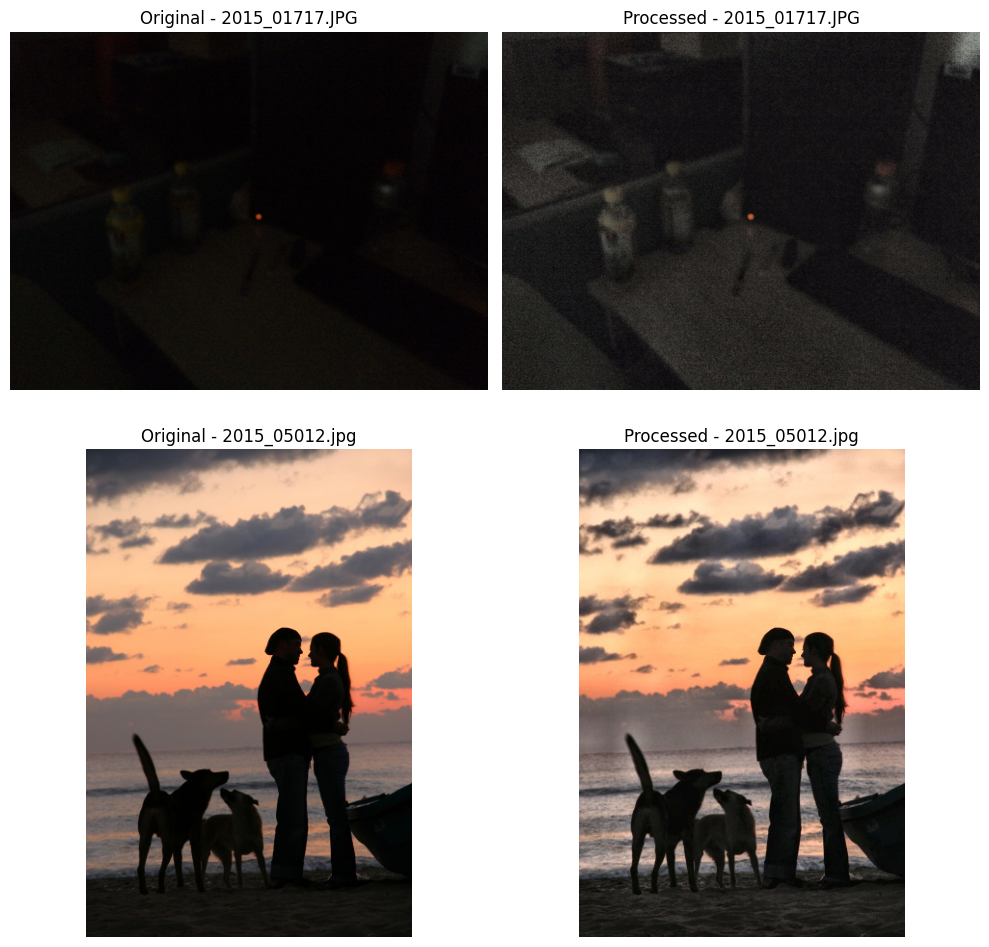

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def find_image_path(root_dir, filename):
    """
    Search recursively for an image filename within the root directory.

    Parameters:
        root_dir (str): The root directory where to search.
        filename (str): The filename to find.

    Returns:
        str: Full path of the image if found, None otherwise.
    """
    for root, _, files in os.walk(root_dir):
        if filename in files:
            return os.path.join(root, filename)
    return None  # Return None if not found

def display_specific_comparisons(input_dir, output_dir, filenames):
    """
    Display specified examples of original and processed images side by side.

    Parameters:
        input_dir (str): Path to the original dataset directory.
        output_dir (str): Path to the processed dataset directory.
        filenames (list): List of specific filenames to display.
    """
    num_samples = len(filenames)

    # Create a figure for visualization
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))

    for i, filename in enumerate(filenames):
        # Find the original image
        original_path = find_image_path(input_dir, filename)
        processed_path = find_image_path(output_dir, filename)

        if original_path and processed_path:
            # Read images
            original_image = cv2.imread(original_path)
            original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

            processed_image = cv2.imread(processed_path)
            processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
        else:
            original_image, processed_image = None, None

        # Display original image
        if original_image is not None:
            axes[i, 0].imshow(original_image)
            axes[i, 0].set_title(f"Original - {filename}")
        else:
            axes[i, 0].text(0.5, 0.5, "Not Found", ha="center", va="center", fontsize=12)
        axes[i, 0].axis("off")

        # Display processed image
        if processed_image is not None:
            axes[i, 1].imshow(processed_image)
            axes[i, 1].set_title(f"Processed - {filename}")
        else:
            axes[i, 1].text(0.5, 0.5, "Not Found", ha="center", va="center", fontsize=12)
        axes[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
file_list = ["2015_01717.JPG", "2015_05012.jpg"]  # Sostituisci con i nomi reali delle immagini
display_specific_comparisons("./ExDark", "./ExDark_Preprocessed", file_list)


In [ ]:
import shutil

def zip_output_directory(output_dir, zip_name):
    """
    Compress the output directory into a ZIP file.

    Parameters:
        output_dir (str): Path to the directory to be compressed.
        zip_name (str): Name of the output ZIP file (without extension).
    """
    zip_path = f"{zip_name}.zip"
    print(f"Zipping directory {output_dir} into {zip_path}...")
    shutil.make_archive(zip_name, 'zip', output_dir)
    print(f"Directory successfully zipped as {zip_path}")

# Call the function after processing the dataset
zip_name = "./ExDark_Preprocessed_Zipped"  # Name of the ZIP file
zip_output_directory(output_dir, zip_name)


Zipping directory ./ExDark_Preprocessed into ./ExDark_Preprocessed_Zipped.zip...
Directory successfully zipped as ./ExDark_Preprocessed_Zipped.zip


In [ ]:
def verify_directory_structure(input_dir, output_dir):
    """
    Verify that the directory structure of the processed dataset matches the original.

    Parameters:
        input_dir (str): Path to the original dataset directory.
        output_dir (str): Path to the processed dataset directory.
    """
    discrepancies = []

    # Walk through the input directory and compare with the output directory
    for root, dirs, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        output_path = os.path.join(output_dir, relative_path)

        # Check if the directory exists in the output
        if not os.path.exists(output_path):
            discrepancies.append(f"Missing directory in output: {output_path}")
            continue

        # Check if all files exist in the corresponding output directory
        for file in files:
            input_file_path = os.path.join(root, file)
            output_file_path = os.path.join(output_path, file)
            if not os.path.exists(output_file_path):
                discrepancies.append(f"Missing file in output: {output_file_path}")

    # Report results
    if discrepancies:
        print("Discrepancies found:")
        for d in discrepancies:
            print(d)
    else:
        print("The directory structure matches between input and output.")

# Example usage
verify_directory_structure(input_dir, output_dir)


The directory structure matches between input and output.
